In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
data = pd.read_csv('final_df.csv')

Y = data['constructor_points']
X = data[['weather_warm', 'weather_cold', 'weather_dry', 'weather_wet', 'weather_cloudy', 'constructor_wins', 'constructor_standings_pos', 'qualifying_time', 'driver_age'] + list(data.columns[18:])]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
coefficients = model.coef_
intercept = model.intercept_
print("Model Coefficients:", coefficients)
print("Intercept:", intercept)

Model Coefficients: [ 0.07624778 -0.36507086 -0.063759    0.16260985 -0.03379367 -0.01698475
 -0.4849656   0.11646274  0.01407993  0.00930452 -0.64514595  0.32912437
 -0.36683396  0.63221111 -1.02777362 -0.53493539 -0.79957727 -0.5167359
 -0.48733532  0.12256901 -0.43822506 -0.46468291 -0.57874841 -0.80836277
 -0.0065221  -0.80589741  0.66421906 -0.60519899  0.33545942 -1.01666954
  0.33438789 -0.96216864 -0.40242399 -0.62397427 -0.43035685  0.51983885
 -0.27931407 -0.50879205 -0.07362631 -0.55741369 -1.12189423 -0.65416896
 -0.35174198 -0.55543676 -0.11321616 -0.64095565 -0.67548113  0.44020975
  0.45984125 -0.18054974  0.89786477 -0.01267185  0.9039888   0.54553553
 -0.7541253  -0.34271455 -0.36024712  0.2518293  -0.90156005 -0.04366175
 -0.69954976  0.64222563  0.74027869 -0.86510443  0.86245916 -0.31513082
  0.54071213 -2.08636909 -2.95039134 -4.51297567 -0.88893632 -4.76147105
 -1.40758578 -2.78178784 -2.00747661 -2.14988729 -2.23395237 -0.55452233
 -2.11822791 -2.93952994 -4.3518

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 36.48995831430108
R-squared (R2): 0.21481701023667843


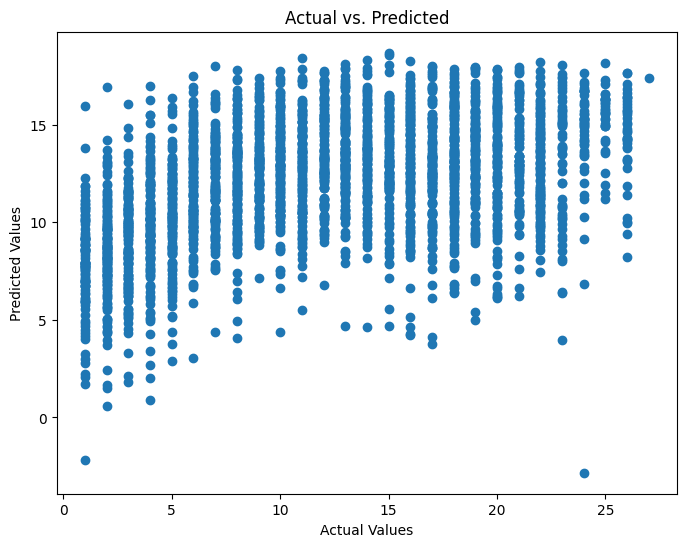

In [17]:
# Actual vs. predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()

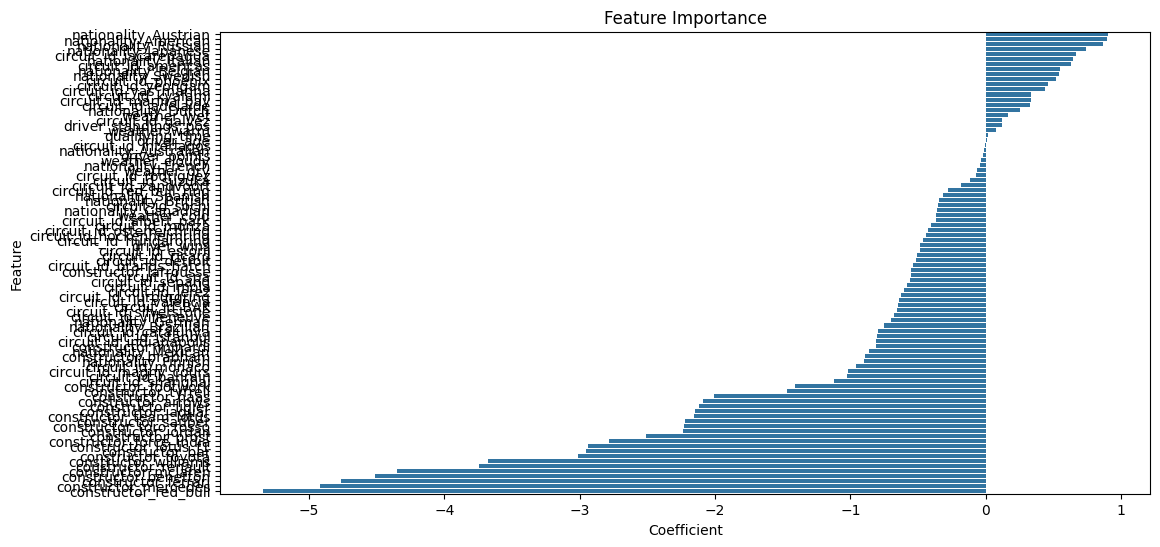

In [18]:
# Feature importance plot
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title("Feature Importance")
plt.show()